In [1]:
# Basic Imports
import sys
import os
import logging
import shutil

In [2]:
# DS utility imports
import pandas as pd
import numpy as np

# DS analysis imports
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
#from sklearn.neighbors import KDTree
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MinMaxScaler
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
            
# DL imports

In [3]:
# plotting import
# import matplotlib.plyplot as plt
%matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Using matplotlib backend: MacOSX


In [4]:
# Imports for accessing, data loading and integration
from bt_ai.stable.data_input.dataframe import MultiDataFrameLoader, DataFrameTarget
from bt_ai.stable.data_input.resources import ResourcesDb

from notebook_utils.logging import setup_logging
from notebook_utils.luigi import run_luigi_tasks

In [5]:
print(sys.version)
print(os.getcwd())

3.4.3 (default, Mar 20 2018, 15:30:09) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
/Users/jitin_lab/Documents/work


In [6]:
df_orig = pd.read_csv('ck_resources.csv')

#creating a copy on which we will do changes
df = df_orig.copy(deep = True)

In [7]:
print(df_orig.columns)
df.columns = [i.replace(' ','_').replace('-','_').lower() for i in df.columns]
df.columns

Index(['resource', 'returns_info', 'thumbnail', 'cat1', 'thumbnail_ALT3',
       'availability', 'url', 'price_currency', 'cat_full', 'body', 'pubDate',
       'modDate', 'keywords', 'price_full', 'price_sale', 'resource-id',
       'isBlacklisted', 'thumbnail_ALT1', 'isUnavailable', 'resource-type',
       'REPLACE', 'title', 'cat2', 'thumbnail_ALT4', 'shipping_info',
       'thumbnail_ALT2', 'description'],
      dtype='object')


Index(['resource', 'returns_info', 'thumbnail', 'cat1', 'thumbnail_alt3',
       'availability', 'url', 'price_currency', 'cat_full', 'body', 'pubdate',
       'moddate', 'keywords', 'price_full', 'price_sale', 'resource_id',
       'isblacklisted', 'thumbnail_alt1', 'isunavailable', 'resource_type',
       'replace', 'title', 'cat2', 'thumbnail_alt4', 'shipping_info',
       'thumbnail_alt2', 'description'],
      dtype='object')

In [8]:
df.head()

,resource,returns_info,thumbnail,cat1,thumbnail_alt3,availability,url,price_currency,cat_full,body,...,thumbnail_alt1,isunavailable,resource_type,replace,title,cat2,thumbnail_alt4,shipping_info,thumbnail_alt2,description
0,product|52061417,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,womens,NaN,instock,http://www.calvinklein.us/en/womens-clothing/w...,USD,bras,lightweight foam padded cups provides extra co...,...,NaN,NaN,{'product'},NaN,signature demi bra,bras,NaN,Most items leave warehouse within 1-2 full bus...,NaN,lightweight foam padded cups provides extra co...
1,product|80237678,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,boys,NaN,instock,http://www.calvinklein.us/en/kids-clothing/boy...,USD,Underwear + Lounge,a 2-pack of calvin klein kids boxer briefs in ...,...,NaN,NaN,{'product'},NaN,boys 2-pack logo boxer briefs,clothing-underwear-lounge,NaN,Most items leave warehouse within 1-2 full bus...,NaN,a 2-pack of calvin klein kids boxer briefs in ...
2,product|22016054,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,mens,NaN,instock,http://www.calvinklein.us/en/mens-clothing/men...,USD,Casual Shirts,"designed with slim fit styling, this long slee...",...,NaN,NaN,{'product'},NaN,slim fit denim long sleeve shirt,shirts,NaN,Most items leave warehouse within 1-2 full bus...,NaN,"designed with slim fit styling, this long slee..."
3,product|12207444,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,womens,NaN,instock,http://www.calvinklein.us/en/womens-clothing/w...,USD,Shirts + Blouses,"this embellished top is made with a v-neck, a ...",...,https://calvinklein.scene7.com/is/image/Calvin...,NaN,{'product'},NaN,stretch button-down long sleeve top,blouses-shirts,NaN,Most items leave warehouse within 1-2 full bus...,https://calvinklein.scene7.com/is/image/Calvin...,"this embellished top is made with a v-neck, a ..."
4,product|25016544,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,mens,NaN,instock,http://www.calvinklein.us/en/mens-clothing/men...,USD,Jeans,a pair of straight leg tapered fit jeans made ...,...,NaN,NaN,{'product'},NaN,straight tapered mid-blue faded jeans,jeans,NaN,Most items leave warehouse within 1-2 full bus...,NaN,a pair of straight leg tapered fit jeans made ...


In [9]:
df.tail()

,resource,returns_info,thumbnail,cat1,thumbnail_alt3,availability,url,price_currency,cat_full,body,...,thumbnail_alt1,isunavailable,resource_type,replace,title,cat2,thumbnail_alt4,shipping_info,thumbnail_alt2,description
1806,product|11207055,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,womens,https://calvinklein.scene7.com/is/image/Calvin...,instock,http://www.calvinklein.us/en/womens-clothing/w...,USD,Tees + Tanks,"constructed with a dual mixed media design, th...",...,https://calvinklein.scene7.com/is/image/Calvin...,NaN,{'product'},NaN,textured contrast button top,tees-tanks,NaN,Most items leave warehouse within 1-2 full bus...,https://calvinklein.scene7.com/is/image/Calvin...,"constructed with a dual mixed media design, th..."
1807,product|37205183,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,womens,NaN,instock,http://www.calvinklein.us/en/womens-clothing/w...,USD,Wallets + Small Goods,"sleek and solid, this card case is made with s...",...,NaN,NaN,{'product'},NaN,leather logo card case,wallets-small-goods,NaN,Most items leave warehouse within 1-2 full bus...,NaN,"sleek and solid, this card case is made with s..."
1808,product|62101086,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,mens,NaN,instock,http://www.calvinklein.us/en/mens-clothing/men...,USD,Trunks,the modern cotton stretch trunk comes in a 2 p...,...,NaN,NaN,{'product'},NaN,modern cotton stretch 2 pack trunk,trunks,NaN,Most items leave warehouse within 1-2 full bus...,NaN,the modern cotton stretch trunk comes in a 2 p...
1809,product|72059195,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,home,NaN,instock,http://www.calvinklein.us/en/home-decor-collec...,USD,Duvet Covers + Sheets,a pillowcase set produced in a 500 thread coun...,...,NaN,NaN,{'product'},NaN,series 01 pillowcase set in yellow,duvet-sheeting,NaN,Most items leave warehouse within 1-2 full bus...,NaN,a pillowcase set produced in a 500 thread coun...
1810,product|18536139,Returns must be made within 30 days of the shi...,https://calvinklein.scene7.com/is/image/Calvin...,womens,NaN,instock,http://www.calvinklein.us/en/womens-clothing/w...,USD,Jeans,our high rise skinny fit is a slightly higher ...,...,NaN,NaN,{'product'},NaN,high rise mid-blue skinny jeans,jeans,NaN,Most items leave warehouse within 1-2 full bus...,NaN,our high rise skinny fit is a slightly higher ...


In [10]:
for i in df.columns:
    print('\nColumn: {} \nValue:'.format(i))
    print(df[i][5])


Column: resource 
Value:
product|13167744

Column: returns_info 
Value:
Returns must be made within 30 days of the shipment date. In order to process your return, items must be unworn and tags must be attached. Clearance and final sale items are not eligible for a return, refund or credit. Once a return is received, it takes 7-14 business days to process and 3-5 business days for the refund to be credited to the payment method used at the time of purchase.

Column: thumbnail 
Value:
https://calvinklein.scene7.com/is/image/CalvinKlein/13167744_099_main?wid=212&hei=279&fmt=jpeg&qlt=90%2c0&op_sharpen=1&resMode=trilin&op_usm=0.8%2c1.0%2c6%2c0&iccEmbed=0

Column: cat1 
Value:
womens

Column: thumbnail_alt3 
Value:
nan

Column: availability 
Value:
instock

Column: url 
Value:
http://www.calvinklein.us/en/womens-clothing/womens-sweaters/lurex-v-neck-sleeveless-top-13167744

Column: price_currency 
Value:
USD

Column: cat_full 
Value:
Sweatshirts + Sweaters

Column: body 
Value:
defined by m

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e0d5b38>]], dtype=object)

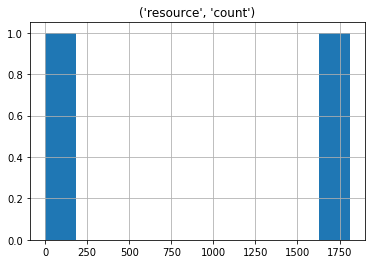

In [11]:
df[['resource_type','resource']].groupby(['resource_type']).agg(['count']).hist()

In [12]:
print(df_orig.price_full.unique()[:5])
df.price_full = df.price_full.apply(lambda x: float(x.replace('$','')))
print(df.price_full.unique()[:5])

['$38.00' '$15.00' '$78.00' '$79.00' '$98.00']
[ 38.  15.  78.  79.  98.]


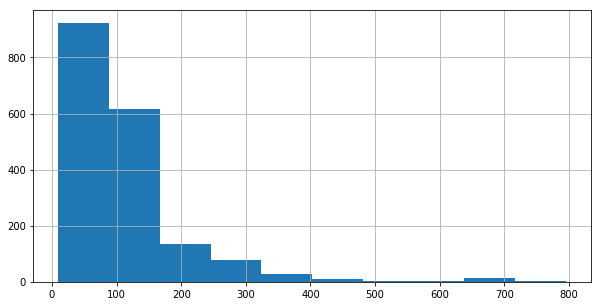

In [13]:
df.price_full.hist()

In [10]:
print(df_orig.price_sale.unique()[:5])
df.price_sale = df.price_sale.apply(lambda x: float(x.replace('$','')))
print(df.price_sale.unique()[:5])


['$38.00' '$15.00' '$78.00' '$79.00' '$98.00']
[ 38.  15.  78.  79.  98.]


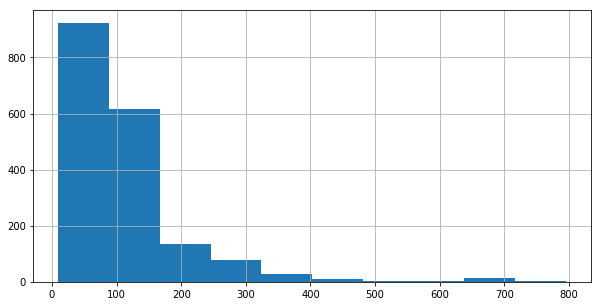

In [11]:
df.price_sale.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de192b0>]], dtype=object)

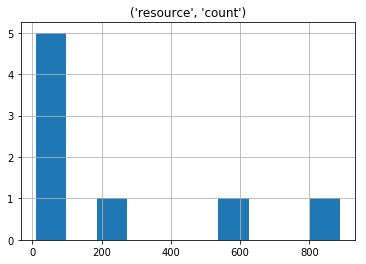

In [16]:
df[['keywords','resource']].groupby(['keywords']).agg(['count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dec4cf8>]], dtype=object)

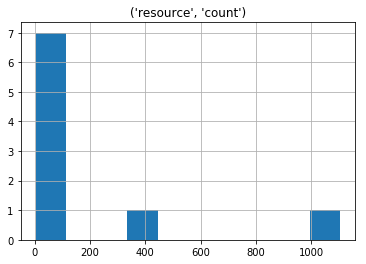

In [17]:
df[['cat1','resource']].groupby(['cat1']).agg(['count']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de2bb00>]], dtype=object)

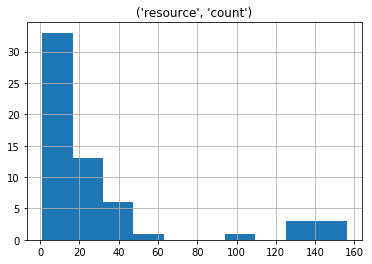

In [18]:
df[['cat2','resource']].groupby(['cat2']).agg(['count']).hist()

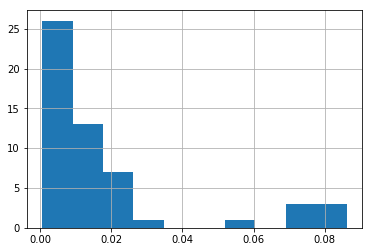

In [19]:
df.cat_full.value_counts(normalize=True).hist()

# df.cat_full.value_counts().hist()

In [20]:
sum(df.cat_full.value_counts(normalize=True).values)

1.0

In [21]:
df.cat_full.apply(lambda x: [i.strip().replace(' ','_').replace('-','_').lower() for i in x.split('+')])

0                                 [bras]
1                    [underwear, lounge]
2                        [casual_shirts]
3                      [shirts, blouses]
4                                [jeans]
5                [sweatshirts, sweaters]
6                [sweatshirts, sweaters]
7                            [outerwear]
8                                [shoes]
9           [3_for_$33_panty_essentials]
10                                [ties]
11                               [jeans]
12                               [jeans]
13                     [shirts, blouses]
14                     [shirts, blouses]
15                     [shirts, blouses]
16                    [watches, jewelry]
17                          [sunglasses]
18                             [bottoms]
19                            [handbags]
20                    [suiting, jackets]
21                         [tees, tanks]
22                           [outerwear]
23               [sweatshirts, sweaters]
24              

In [22]:
print(df.availability.unique())
sum(df.availability == 'instock')/df.shape[0]

['instock']


1.0

# As per the paper categorical variables a used as binary vector and then used single FC layer to make sense of it! 

### Generating logic for number of neurons in hidden layer

### As per the microsoft paper for categorical variables the possible combination in data set considered
### to make this a generic process we have to do some cross tab frequency based filtering and cross tab analysis

### Will try to define proportion thresholding logic to this.

#### We'll be now try to generate some logic which can be paramatrized and run on various datasets

In [23]:

# First will try to make bins based of frequency of categories

# Threshold is set on follwing priorities:
# 1) Number of categories is less than 10 then no thresholding (can be returned)
# 2) The probability of occurence should be greater than 2% (can be tweaked)
# 3) should make 1% of data (can be tweaked)

# Thresholding is to decresae the categoricla space for cross tabs

# TODO: deal with NA values as category
def get_freq_table(data,numCat = 10, prob_thresh = 0.02,data_thresh=0.005,return_cats = False):
    shp = data.shape
    thresh_val = data_thresh*shp[0]
    
    if len(shp)==1:
        df_cat = data.value_counts()
        probs = np.round(df_cat.values/shp[0]*100,2)
        thres = df_cat.values >= thresh_val
        df = pd.DataFrame({'index' : df_cat.index,
                           'freq'  : df_cat.values,
                           'prob'  : probs,
                           'prob_t': probs > prob_thresh*100,
                           'thres' : thres})
        shp = df.shape
        prob_cat = sum(df.prob_t)
        thres_cat = sum(df.thres)
        if shp[0] <= numCat:
            df['suggested_cat'] = True
        elif (prob_cat/shp[0]) > (thres_cat/shp[0]) and prob_cat >= numCat:
            df['suggested_cat'] = df.prob_t
        elif (prob_cat/shp[0]) <= (thres_cat/shp[0])and thres_cat >= numCat:
            df['suggested_cat'] = df.thres
        else:
            df['suggested_cat'] = True
            
        print(' Freq table Shape: {} Prob Thresh :{} Threshold Filter:{}'.format(
            df.shape[0],sum(df.prob_t),sum(df.thres)))
        
        df = df[['index','freq','prob','prob_t','thres','suggested_cat']]
        if return_cats:
            return df,df[df.suggested_cat]['index'].values
        else:
            return df
    else:
        print('Only single pandas array is acceptable. Retruning None!')
        return None


In [24]:
get_freq_table(df.cat_full,prob_thresh=0.015)

 Freq table Shape: 54 Prob Thresh :15 Threshold Filter:45


,index,freq,prob,prob_t,thres,suggested_cat
0,Jeans,156,8.61,True,True,True
1,Handbags,147,8.12,True,True,True
2,Shirts + Blouses,146,8.06,True,True,True
3,Dresses,138,7.62,True,True,True
4,Tees + Tanks,132,7.29,True,True,True
5,Sweatshirts + Sweaters,126,6.96,True,True,True
6,Outerwear,101,5.58,True,True,True
7,Wallets + Small Goods,48,2.65,True,True,True
8,bras,40,2.21,True,True,True
9,Skirts,39,2.15,True,True,True


In [25]:
get_freq_table(df.keywords)

 Freq table Shape: 8 Prob Thresh :5 Threshold Filter:8


,index,freq,prob,prob_t,thres,suggested_cat
0,{'whitelabel'},889,49.09,True,True,True
1,{'jeans'},568,31.36,True,True,True
2,{'underwear'},189,10.44,True,True,True
3,{'NULL'},85,4.69,True,True,True
4,{'collection-home'},40,2.21,True,True,True
5,{'calvinklein-home'},18,0.99,False,True,True
6,{'platinum'},12,0.66,False,True,True
7,{'home'},10,0.55,False,True,True


In [26]:
get_freq_table(df.cat1)

 Freq table Shape: 9 Prob Thresh :6 Threshold Filter:7


,index,freq,prob,prob_t,thres,suggested_cat
0,womens,1105,61.02,True,True,True
1,mens,437,24.13,True,True,True
2,home,74,4.09,True,True,True
3,boys,59,3.26,True,True,True
4,girls,56,3.09,True,True,True
5,women,51,2.82,True,True,True
6,fragrance,19,1.05,False,True,True
7,towels,5,0.28,False,False,True
8,underwear,4,0.22,False,False,True


In [27]:
get_freq_table(df.cat2)

 Freq table Shape: 60 Prob Thresh :11 Threshold Filter:46


,index,freq,prob,prob_t,thres,suggested_cat
0,jeans,156,8.61,True,True,True
1,handbags,147,8.12,True,True,True
2,blouses-shirts,146,8.06,True,True,True
3,dresses,138,7.62,True,True,True
4,tees-tanks,132,7.29,True,True,True
5,sweaters,126,6.96,True,True,True
6,outerwear,98,5.41,True,True,True
7,wallets-small-goods,48,2.65,True,True,True
8,bras,40,2.21,True,True,True
9,watches,39,2.15,True,True,True


In [335]:
# Wrapper around get_freq_table to get the binned categories as output
def categorical_binner(data,cat_name = '',numCat = 10, prob_thresh = 0.02,data_thresh=0.005,print_sub_df = False):
    if cat_name not in data.columns:
        print('{} is not in data hence cannot make categorical features. Retruning None!')
        return None
    else:
        print('For Categorical Column: {}'.format(cat_name))
        if len(data[cat_name].unique()) >= 0.8*data.shape[0]:
            print('Too many categories to process! Probably you should not do categorical feature processing on it!')
        df_cat = data[cat_name]
        df,cats = get_freq_table(df_cat, numCat=numCat,prob_thresh=prob_thresh,data_thresh=data_thresh,
                                 return_cats=True)
        if print_sub_df:
            print(df)
            return df_cat.where(df_cat.isin(cats),'others'),df,cats
        return df_cat.where(df_cat.isin(cats),'others')

In [337]:
categorical_binner(df,'cat2',print_sub_df=True)

For Categorical Column: cat2
 Freq table Shape: 47 Prob Thresh :12 Threshold Filter:47
                        index  freq  prob  prob_t  thres  suggested_cat
0                       jeans   156  8.61    True   True           True
1                    handbags   147  8.12    True   True           True
2              blouses-shirts   146  8.06    True   True           True
3                     dresses   138  7.62    True   True           True
4                  tees-tanks   132  7.29    True   True           True
5                    sweaters   126  6.96    True   True           True
6                   outerwear    98  5.41    True   True           True
7                      others    77  4.25    True   True           True
8         wallets-small-goods    48  2.65    True   True           True
9                        bras    40  2.21    True   True           True
10                    watches    39  2.15    True   True           True
11                     skirts    39  2.15    True

(0                            bras
 1       clothing-underwear-lounge
 2                          shirts
 3                  blouses-shirts
 4                           jeans
 5                        sweaters
 6                        sweaters
 7                       outerwear
 8                           shoes
 9           special-value-panties
 10                           ties
 11                          jeans
 12                          jeans
 13                 blouses-shirts
 14                 blouses-shirts
 15                 blouses-shirts
 16                        watches
 17                     sunglasses
 18               clothing-bottoms
 19                       handbags
 20                          suits
 21                     tees-tanks
 22                      outerwear
 23                       sweaters
 24                         others
 25          special-value-panties
 26                        panties
 27                     tees-tanks
 28                 

In [30]:
for cat_col in ['cat1','cat2','keywords','cat_full']:
    df[cat_col] = categorical_binner(df,cat_name=cat_col,print_sub_df=True)

For Categorical Column: cat1
 Freq table Shape: 9 Prob Thresh :6 Threshold Filter:7
       index  freq   prob  prob_t  thres  suggested_cat
0     womens  1105  61.02    True   True           True
1       mens   437  24.13    True   True           True
2       home    74   4.09    True   True           True
3       boys    59   3.26    True   True           True
4      girls    56   3.09    True   True           True
5      women    51   2.82    True   True           True
6  fragrance    19   1.05   False   True           True
7     towels     5   0.28   False  False           True
8  underwear     4   0.22   False  False           True
For Categorical Column: cat2
 Freq table Shape: 60 Prob Thresh :11 Threshold Filter:46
                        index  freq  prob  prob_t  thres  suggested_cat
0                       jeans   156  8.61    True   True           True
1                    handbags   147  8.12    True   True           True
2              blouses-shirts   146  8.06    True   T

In [33]:
pd.crosstab(df.cat1,df.keywords,dropna=False)

keywords,{'NULL'},{'calvinklein-home'},{'collection-home'},{'home'},{'jeans'},{'platinum'},{'underwear'},{'whitelabel'}
cat1,,,,,,,,
boys,0,0,0,0,27,0,8,24
fragrance,19,0,0,0,0,0,0,0
girls,5,0,0,0,21,0,13,17
home,4,18,35,10,0,0,0,7
mens,17,0,0,0,140,3,63,214
others,0,0,0,0,1,0,0,0
towels,0,0,5,0,0,0,0,0
underwear,0,0,0,0,0,0,4,0
women,0,0,0,0,0,0,51,0


In [62]:
cross = pd.crosstab(df.cat1,df.keywords,dropna=False)
cross.values

array([[  0,   0,   0,   0,  27,   0,   8,  24],
       [ 19,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,  21,   0,  13,  17],
       [  4,  18,  35,  10,   0,   0,   0,   7],
       [ 17,   0,   0,   0, 140,   3,  63, 214],
       [  0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   0,   0,   0,  51,   0],
       [ 40,   0,   0,   0, 379,   9,  50, 627]])

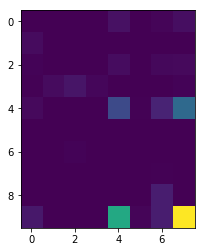

In [44]:
import matplotlib.pyplot as plt

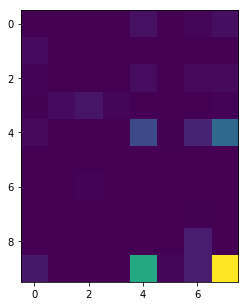

In [132]:
plt.imshow(pd.crosstab(df.cat1,df.keywords,dropna=False).values)
plt.show()

In [48]:
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.layouts import row
# from bokeh.plotting import figure
# output_notebook()

In [41]:
pd.crosstab(df.cat_full,df.cat1)

cat1,boys,fragrance,girls,home,mens,others,towels,underwear,women,womens
cat_full,,,,,,,,,,
3 for $33 Panty Essentials,0,0,0,0,0,0,0,0,25,0
40% Off Sale,0,0,0,15,0,0,0,0,0,0
80% Off Final Sale,0,0,0,16,0,0,0,0,0,0
Activewear,0,0,0,0,0,0,0,0,0,13
Baby 0-24 Months,12,0,0,0,0,1,0,0,0,0
Bags,0,0,0,0,19,0,0,0,0,0
Belts,0,0,0,0,6,0,0,0,0,4
Bottoms,4,0,12,0,0,0,0,0,0,0
Briefs,0,0,0,0,12,0,0,0,0,0


keywords   {'NULL'}  {'calvinklein-home'}  {'collection-home'}  {'home'}  \
cat1                                                                       
boys              0                     0                    0         0   
fragrance        19                     0                    0         0   
girls             5                     0                    0         0   
home              4                    18                   35        10   
mens             17                     0                    0         0   
others            0                     0                    0         0   
towels            0                     0                    5         0   
underwear         0                     0                    0         0   
women             0                     0                    0         0   
womens           40                     0                    0         0   

keywords   {'jeans'}  {'platinum'}  {'underwear'}  {'whitelabel'}  
cat1               

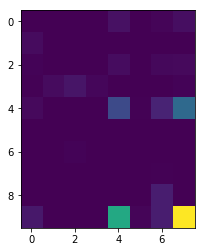

In [58]:
def plot_crosstabs(data,var1,var2):
    crosstab = pd.crosstab(df[var1],df[var2],dropna=False)
    print(crosstab)
    plt.imshow(crosstab.values)
    plt.show()
    
plot_crosstabs(df,'cat1','keywords')


cat2                             baby-0-to-24-months  bags  belts  \
cat_full                                                            
3 for $33 Panty Essentials                         0     0      0   
40% Off Sale                                       0     0      0   
80% Off Final Sale                                 0     0      0   
Activewear                                         0     0      0   
Baby 0-24 Months                                  12     0      0   
Bags                                               0    19      0   
Belts                                              0     0     10   
Bottoms                                            0     0      0   
Briefs                                             0     0      0   
Casual Shirts                                      0     0      0   
Dress Shirts                                       0     0      0   
Dresses                                            0     0      0   
Dresses + Skirts                  

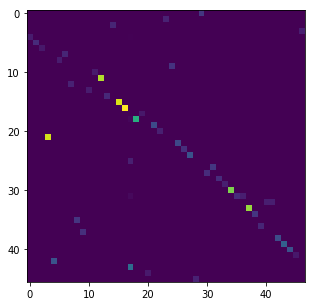

In [133]:
plot_crosstabs(df,'cat_full','cat2')

cat2                  baby-0-to-24-months  bags  belts  blouses-shirts  bras  \
keywords                                                                       
{'NULL'}                                0     0      0               4     0   
{'calvinklein-home'}                    0     0      0               0     0   
{'collection-home'}                     0     0      0               0     0   
{'home'}                                0     0      0               0     0   
{'jeans'}                              12     7      0              20     0   
{'platinum'}                            0     0      0               0     0   
{'underwear'}                           0     0      0               0    40   
{'whitelabel'}                          0    12     10             122     0   

cat2                  briefs  clothing-bottoms  clothing-dresses-skirts  \
keywords                                                                  
{'NULL'}                   0                 2   

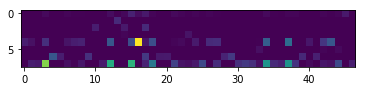

In [60]:
plot_crosstabs(df,'keywords','cat2')

cat_full              3 for $33 Panty Essentials  40% Off Sale  \
keywords                                                         
{'NULL'}                                       0             1   
{'calvinklein-home'}                           0             0   
{'collection-home'}                            0             0   
{'home'}                                       0             8   
{'jeans'}                                      0             0   
{'platinum'}                                   0             0   
{'underwear'}                                 25             0   
{'whitelabel'}                                 0             6   

cat_full              80% Off Final Sale  Activewear  Baby 0-24 Months  Bags  \
keywords                                                                       
{'NULL'}                               3           1                 0     0   
{'calvinklein-home'}                   0           0                 0     0   
{'collection-home'}

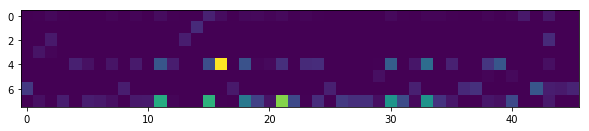

In [134]:
plot_crosstabs(df,'keywords','cat_full')

In [75]:
# Crosstab sparsity:
## This is defined as cell less than median / no of cells
## Hypothesis: If there is no interaction then all should equally filled hence higher the value lower the interaction.

np.median(cross.values),np.mean(cross.values),np.std(cross.values),np.max(cross.values),np.min(cross.values),\
    np.histogram(cross.values),np.sum(cross.values>np.median(cross.values)),\
    np.sum(cross.values>np.median(cross.values))/(cross.values.shape[0]*cross.values.shape[1])

(0.0,
 22.637499999999999,
 84.899093597929536,
 627,
 0,
 (array([75,  1,  1,  1,  0,  0,  1,  0,  0,  1]),
  array([   0. ,   62.7,  125.4,  188.1,  250.8,  313.5,  376.2,  438.9,
          501.6,  564.3,  627. ])),
 27,
 0.33750000000000002)

In [86]:
def crosstab_sparsity(data,var1,var2,print_stats=True):
    if isinstance(var2,str):
        cross = pd.crosstab(df[var1],df[var2],dropna=False)
    else:
        cross = pd.crosstab(df[var1],var2,dropna=False)
    if print_stats:
        print('Median: {} , Mean: {}, StDev: {}, Max: {}, Min: {}, \nHistogram: \n{}\n'\
              'Sum of True Values on Hypothesis: {} \nSparsity: {}'.format(np.median(cross.values),
                                                                          np.mean(cross.values),
                                                                          np.std(cross.values),
                                                                          np.max(cross.values),
                                                                          np.min(cross.values),
                                                                          np.histogram(cross.values),
                                                                          np.sum(cross.values>np.median(
                                                                              cross.values)),
                                                                          np.sum(cross.values>np.median(
                                                                              cross.values))/(
                                                                              cross.values.shape[0]*
                                                                              cross.values.shape[1])))
    return np.sum(cross.values>np.median(cross.values))/(cross.values.shape[0]*cross.values.shape[1])
    

In [87]:
crosstab_sparsity(df,'keywords','cat_full')

0.27717391304347827

In [88]:
crosstab_sparsity(df,'keywords','cat1')

0.33750000000000002

In [89]:
crosstab_sparsity(df,'keywords','cat2')

0.26861702127659576

In [90]:
crosstab_sparsity(df,'cat_full','cat2')

0.023589269195189638

In [85]:
import itertools

In [95]:
for v1,v2 in itertools.combinations(['cat1','cat2','keywords','cat_full'],2):
    print(v1,v2,crosstab_sparsity(df,v1,v2))
    

cat1 cat2 0.140425531915
cat1 keywords 0.3375
cat1 cat_full 0.147826086957
cat2 keywords 0.268617021277
cat2 cat_full 0.0235892691952
keywords cat_full 0.277173913043


In [ ]:
# DL Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import softmax
from keras.losses import mean_squared_error,categorical_crossentropy,cosine,kullback_leibler_divergence
from keras.optimizers import RMSprop
from keras.regularizers import l1

In [ ]:
from keras.layers import *
from keras.models import Model
from keras.utils import plot_model


In [ ]:
# Brute parametric method for defining number of nurons in hidden layer
def get_cat_embeddings(data,cat_name,reduction_ratio = 0.3):
    # Brute force logic is just certain percentage of the number of categories will be size of hidden layer
    # Example A category with 10 values and reduction_ratio of 0.3 will have hiddens layer of size 3 == 10*0.3
    size_h=np.ceil(data[cat_name].unique()*reduction_ratio)
    pass

# Text data if dealt with clustering based probability feature space.

#### The paper talks about two apporaches:
#### 1) Using CNN based clasifier approach to draw m-feature for word2vec of text 
#### 2) Clustering based text similarity feature space we will use LDA for the purpose for topic modelling.

In [97]:
# Lets made word2 vec representation first as this will be the input for two of apporaches

count_vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,2),
    preprocessor=None, stop_words='english' 
#                                    ,max_features=
                                  )    


(1811, 573)
(array([394,  74,  38,  16,   8,  11,   5,   8,   4,   1,   2,   0,   1,
         1,   0,   2,   0,   1,   0,   2,   2,   1,   0,   0,   0,   0,
         0,   0,   1,   1]), array([   2.        ,    9.66666667,   17.33333333,   25.        ,
         32.66666667,   40.33333333,   48.        ,   55.66666667,
         63.33333333,   71.        ,   78.66666667,   86.33333333,
         94.        ,  101.66666667,  109.33333333,  117.        ,
        124.66666667,  132.33333333,  140.        ,  147.66666667,
        155.33333333,  163.        ,  170.66666667,  178.33333333,
        186.        ,  193.66666667,  201.33333333,  209.        ,
        216.66666667,  224.33333333,  232.        ]))
(array([  1,  16, 103, 461, 533, 417, 187,  75,  16,   2]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))


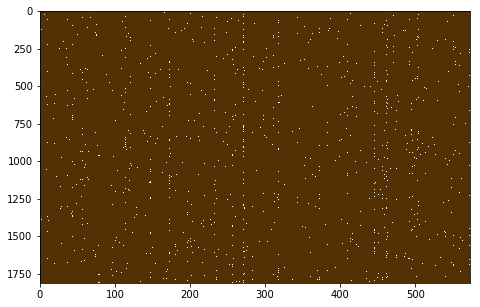

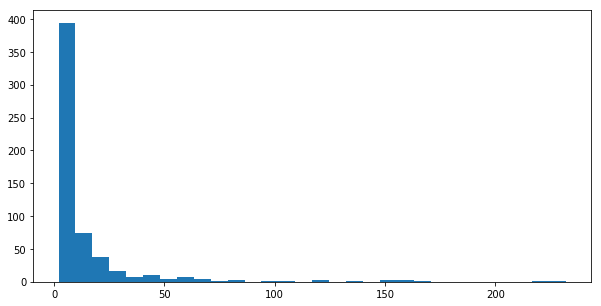

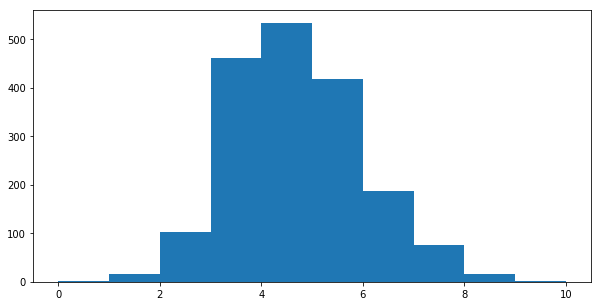

In [220]:
count_vectorizer = CountVectorizer(analyzer="word"
                                   , ngram_range=(1,1)
                                   , preprocessor=None
                                   , stop_words='english'
                                   , min_df=0.001
                                   
#                                    ,max_features=
                                  ) 
arr = count_vectorizer.fit_transform(df.title).toarray()
print(arr.shape)
print(np.histogram(np.sum(arr,axis=0),bins=30))
print(np.histogram(np.sum(arr,axis=1),bins=10))
plt.imshow(arr,aspect=0.2,cmap='BrBG')
plt.show()
plt.hist(x = np.sum(arr,axis=0),
         bins = np.histogram(np.sum(arr,axis=0),bins=30)[1])
plt.show()
plt.hist(x = np.sum(arr,axis=1),
         bins = np.histogram(np.sum(arr,axis=1),bins=10)[1])
plt.show()


(1811, 1000)
(array([789,  91,  38,  15,  15,  12,  12,   5,   2,   4,   3,   1,   2,
         1,   3,   1,   1,   0,   1,   2,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   1]), array([   3.        ,   26.96666667,   50.93333333,   74.9       ,
         98.86666667,  122.83333333,  146.8       ,  170.76666667,
        194.73333333,  218.7       ,  242.66666667,  266.63333333,
        290.6       ,  314.56666667,  338.53333333,  362.5       ,
        386.46666667,  410.43333333,  434.4       ,  458.36666667,
        482.33333333,  506.3       ,  530.26666667,  554.23333333,
        578.2       ,  602.16666667,  626.13333333,  650.1       ,
        674.06666667,  698.03333333,  722.        ]))
(array([ 32, 109, 461, 771, 301,  81,  33,  14,   4,   5]), array([  2. ,   5.9,   9.8,  13.7,  17.6,  21.5,  25.4,  29.3,  33.2,
        37.1,  41. ]))


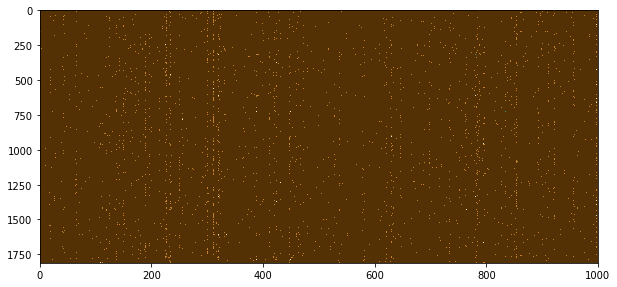

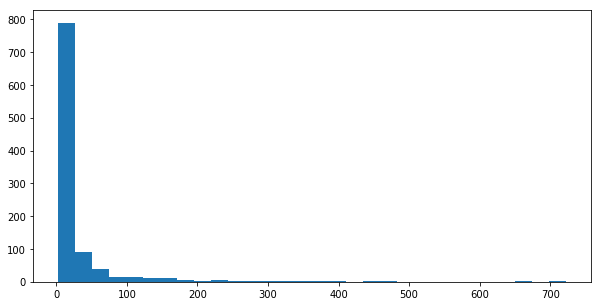

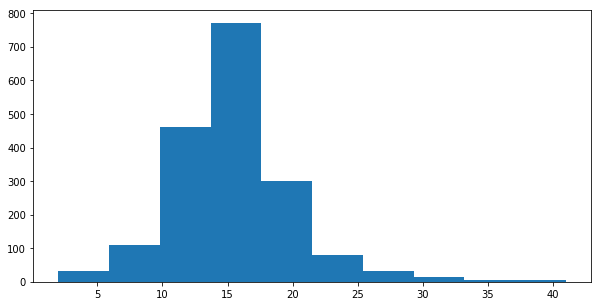

In [219]:
count_vectorizer = CountVectorizer(analyzer="word"
                                   , ngram_range=(1,1)
                                   , preprocessor=None
                                   , stop_words='english'
#                                    , min_df=0.001
                                   ,max_features=1000
                                  ) 
arr = count_vectorizer.fit_transform(df.body).toarray()
print(arr.shape)
print(np.histogram(np.sum(arr,axis=0),bins=30))
print(np.histogram(np.sum(arr,axis=1),bins=10))
plt.imshow(arr,aspect=0.25,cmap='BrBG')
plt.show()
plt.hist(x = np.sum(arr,axis=0),
         bins = np.histogram(np.sum(arr,axis=0),bins=30)[1])
plt.show()
plt.hist(x = np.sum(arr,axis=1),
         bins = np.histogram(np.sum(arr,axis=1),bins=10)[1])
plt.show()

In [174]:
from time import time


In [215]:
# Trying ot fit and test

#data to use
data_samples = df.body

# features
n_samples = 2000
n_features = 1500
n_components = 25
n_top_words = 20



# Print funciton for printing words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=500,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf_fn = NMF(n_components=n_components, 
          random_state=1,
          alpha=.1, 
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_fn, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf_kl = NMF(n_components=n_components, 
          random_state=1,
          beta_loss='kullback-leibler', 
          solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf_kl, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LDA(n_components=n_components, 
          max_iter=20,
          learning_method='batch',
          batch_size=256,
          learning_offset=50.,
          evaluate_every=10,
          random_state=143,
          n_jobs=4)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf-idf features for NMF...
done in 0.064s.
Extracting tf features for LDA...
done in 0.060s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1500...
done in 0.219s.

Topics in NMF model (Frobenius norm):
Topic #0: ribbed knit trim sweater long sleeve wool blend crewneck merino detailing cut shoulders fine neckline logo crafted fabric features soft
Topic #1: denim pocket wash jeans styling waist blue pair rise medium cotton detailing hardware stretch italian light fit slim faded rigid
Topic #2: bag interior strap zip leather shoulder dual handles closure tote textured adjustable crossbody logo pebble fully lined plaque features chainlink
Topic #3: dress round sheath zip silhouette fitted closure neckline concealed sleeveless features stretch scuba neck sleeves like goldtone colorblock fabric soft
Topic #4: button closures long shirttail hem sleeve collar shirt western point cuffs curved flap chest features updated cotton classic poc

(1811, 25)


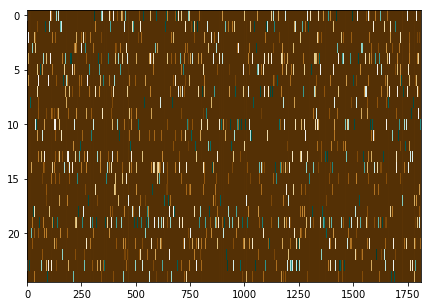

In [216]:
print(lda.transform(tf).shape)
plt.imshow(lda.transform(tf).T,
           aspect=50,
           cmap='BrBG')
plt.show()

(1811, 25)


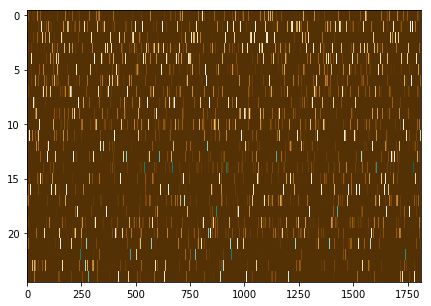

In [217]:
print(nmf_fn.transform(tfidf).shape)
plt.imshow(nmf_kl.transform(tfidf).T,
           aspect=50,
           cmap='BrBG')
plt.show()

(1811, 25)


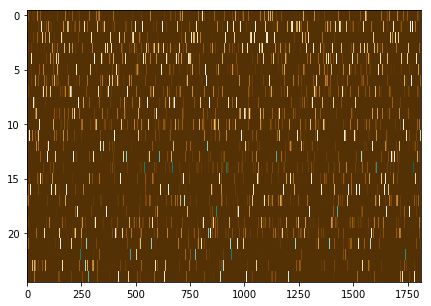

In [218]:
print(nmf_kl.transform(tfidf).shape)
plt.imshow(nmf_kl.transform(tfidf).T,
           aspect=50,
           cmap='BrBG')
plt.show()

In [36]:
## Defining function to take text as input and generate topic matirx from the text
def get_word_vec(data,text_name,transformer='tfidf',method='lda',n_components=10,max_features=500,
                 plotit=True,print_topics=25,retrun_values=False):
    
    # Getting data from Data frame
    text = data[text_name]
    
    # Setting transformer
    if transformer == 'tfidf':
        vectorize = TfidfVectorizer(analyzer="word",
                                   ngram_range=(1,2),
                                   max_df=0.95, 
                                   min_df=2,
                                   max_features=max_features,
                                   stop_words='english')
        features = vectorize.fit_transform(text)
    elif transformer == 'cvt':
        vectorize = CountVectorizer(analyzer="word"
                                   , ngram_range=(1,2)
                                   , preprocessor=None
                                   , stop_words='english'
                                   , min_df=0.001
                                   , max_features=max_features
                                  ) 
        features = vectorize.fit_transform(text)
    else:
        pass
    
    # Making models
    if method == 'lda':
        model = LDA(n_components=n_components, 
                      max_iter=20,
                      learning_method='batch',
                      batch_size=256,
                      learning_offset=50.,
                      evaluate_every=10,
                      random_state=143,
                      n_jobs=4).fit(features)
        
    elif method == 'nmf_fn':
        model = NMF(n_components=n_components, 
                  random_state=1,
                  alpha=.1, 
                  l1_ratio=.5).fit(features_)
    
    elif method == 'nmf_kl':
        model = NMF(n_components=n_components, 
                  random_state=1,
                  beta_loss='kullback-leibler', 
                  solver='mu', max_iter=1000, alpha=.1,
                  l1_ratio=.5).fit(features)
    
    elif method == 'kmeans':
        pass
    
    else:
        print('Default is set to LDA model!')
        model = LDA(n_components=n_components, 
                      max_iter=20,
                      learning_method='batch',
                      batch_size=256,
                      learning_offset=50.,
                      evaluate_every=10,
                      random_state=143,
                      n_jobs=4).fit(features)
    
    
    # printing topics
    if print_topics is not None and print_topics >0:
        feature_names = vectorize.get_feature_names()
        for topic_idx, topic in enumerate(model.components_):
            message = "Topic #%d: " % topic_idx
            message += " ".join([feature_names[i]
                                 for i in topic.argsort()[:-print_topics - 1:-1]])
            print(message)
    
    # plotting it
    if plotit:
        arr = features.toarray()
        plt.imshow(arr,aspect=0.25,cmap='binary')
        plt.show()
        plt.hist(x = np.sum(arr,axis=0),
             bins = np.histogram(np.sum(arr,axis=0),bins=30)[1])
        plt.show()
        plt.hist(x = np.sum(arr,axis=1),
             bins = np.histogram(np.sum(arr,axis=1),bins=10)[1])
        plt.show()
        plt.imshow(model.transform(features).T,
           aspect=50,
           cmap='BrBG')
        plt.show()
    
    if retrun_values:
        return vectorizer, model, model.transform(features) 
        

Topic #0: logo shirt logo shirt monogram monogram logo cotton belted suede crewneck coat tank fitted crewneck shirt padded trench shell soft logo cotton trench coat clutch cap biscay cotton biscay linen mineral
Topic #1: bag leather tote tote bag pebble pebble leather crossbody satchel crossbody bag monogram saffiano saffiano leather wallet large hobo chainlink leather tote trifold trifold wallet grid chainlink tote medium floral smooth leather crossbody
Topic #2: logo cropped pleat pack pleat neck hoodie socks metallic cut band girls logo cropped tailored girls pack tailored band band percale percale eternity coated men logo hoodie terry oversized pack logo cropped bras
Topic #3: jeans skinny blue sculpted ankle jeans ankle light skinny jeans light blue ultimate blue jeans blue ankle black slim slim jeans ultimate skinny mid blue vintage leg high mid skinny leg faded destructed high low
Topic #4: skirt girls wool textured sweater jacket dress denim bomber bomber jacket merino merino w

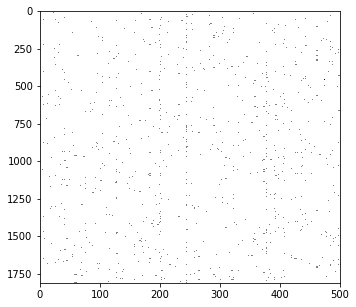

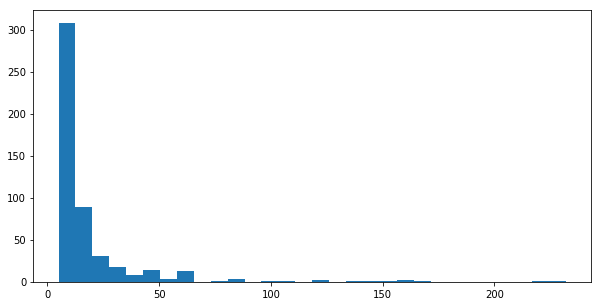

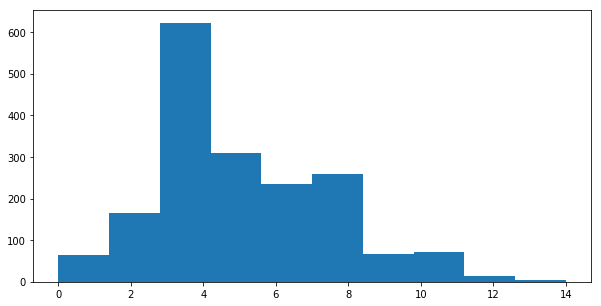

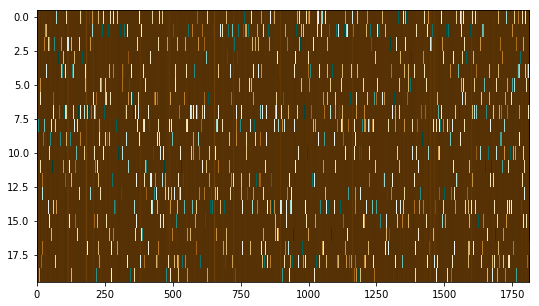

NameError: name 'vectorizer' is not defined

In [37]:
get_word_vec(df,'title',transformer='cvt',method='lda',n_components=20,retrun_values=True)


Topic #0: round dress closure features neckline zip zip closure sleeveless stretch dress features neck round neck round neckline silhouette concealed fabric features round concealed zip sheath fitted
Topic #1: fit denim wash rise pocket styling jeans pocket styling skinny waist high skinny fit straight blue pair rise waist leg cotton high rise stretch
Topic #2: sleeve soft long neck hem hand long sleeve topstitching shoulders straight sleeve features round sleeves features fabric straight hem soft hand featuring round neck short
Topic #3: zip pockets jacket closure zip closure collar features waist jacket features soft hood stand size zip pockets plus size plus belted stand collar collar zip belted waist
Topic #4: logo cotton knit ribbed ribbed knit crewneck trim knit trim sleeve features fit styling shirt chest long blend sweater long sleeve crafted detailing
Topic #5: pockets button jacket flap flap pockets closure button closure classic lapels notch fabric features pants single notc

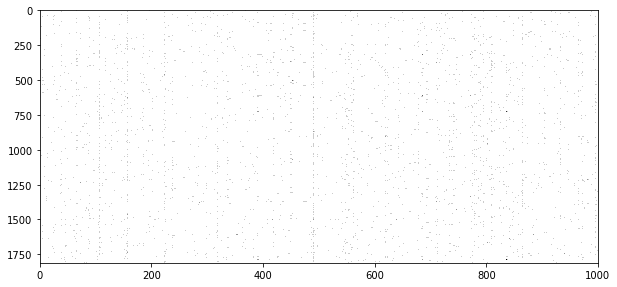

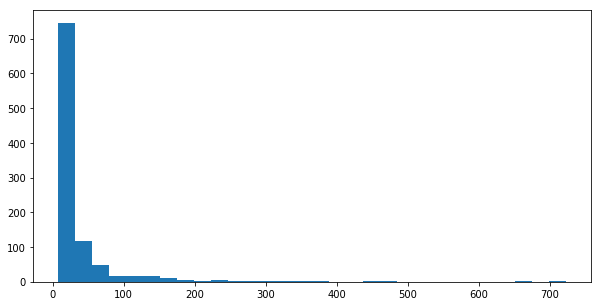

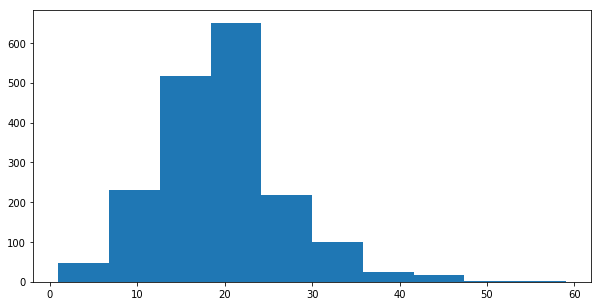

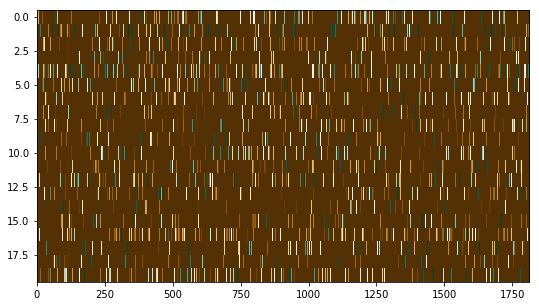

In [237]:
get_word_vec(df,'body',transformer='cvt',method='lda',n_components=20,max_features=1000)


Topic #0: dress dress features zip zip closure concealed concealed zip silhouette closure sheath round neckline sleeveless dress fitted sleeveless features fitted sheath stretch sheath silhouette neck round neckline
Topic #1: wash denim pocket styling jeans pocket styling rise fit blue waist pair rise waist skinny cotton stretch stretch cotton blue wash stretch denim fit jeans waist pocket
Topic #2: neck hem sleeveless round straight straight hem neckline soft plaque logo plaque polished logo round neck polished features sleeve soft stretch fabric stretch curved long
Topic #3: skirt pencil skirt features waistband wide composed vent metallic quilted slim coin coin pocket waist suit finish way single look straight pocket
Topic #4: bra pack straps lace featuring cold cold shoulders construction comfort nylon nylon stretch feature adjustable straps socks low high low fit push trim cups
Topic #5: pockets jacket button flap button closure flap pockets lapels fabric elasticated waist notch c

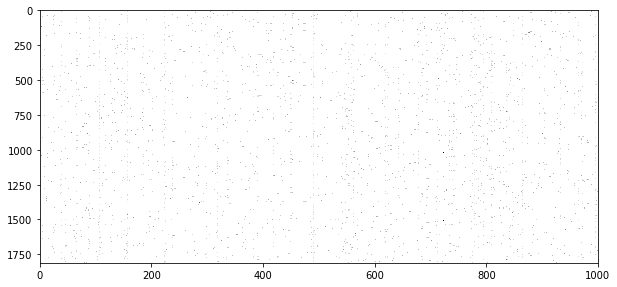

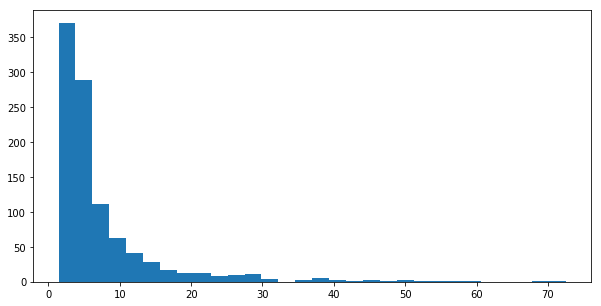

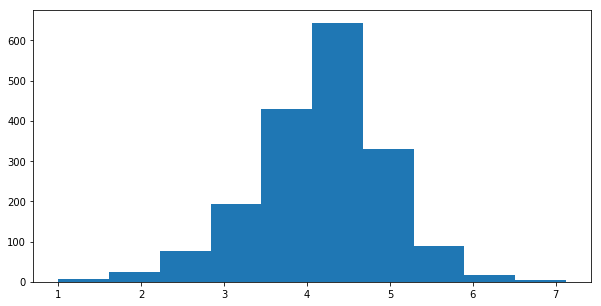

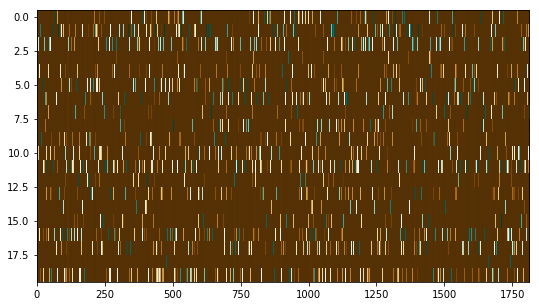

In [238]:
get_word_vec(df,'body',transformer='tfidf',method='lda',n_components=20,max_features=1000)

# Now we will deal with countineous variables.

### We will normalize these variabels before imputing. This is essentially done becaus all other features are between 0 and 1. Hence to avoid any biasness within the network.

#### Also we will convert datetime to numeric and treat it as numeric variable as suggested in paper.
#### An alternate to use months/days/hours as categorical variable too.( Experimental)

In [239]:
minmaxer = MinMaxScaler()
df.dtypes

resource           object
returns_info       object
thumbnail          object
cat1               object
thumbnail_alt3     object
availability       object
url                object
price_currency     object
cat_full           object
body               object
pubdate            object
moddate            object
keywords           object
price_full        float64
price_sale        float64
resource_id       float64
isblacklisted     float64
thumbnail_alt1     object
isunavailable     float64
resource_type      object
replace           float64
title              object
cat2               object
thumbnail_alt4     object
shipping_info      object
thumbnail_alt2     object
description        object
dtype: object

In [242]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics).columns

Index(['price_full', 'price_sale', 'resource_id', 'isblacklisted',
       'isunavailable', 'replace'],
      dtype='object')

In [245]:
df.price_full.std()

94.12930050940398

In [262]:
for col_ in df.select_dtypes(include=numerics).columns:
    if str(col_).count('_id') == 0:
        print(df[col_].shape)
        print('Columns {} has \n Unique: {} Max: {} Min: {} Mean: {} Sd: {} Median: {}'.format(
            col_,len(df[col_].unique()),df[col_].max(),df[col_].min(),df[col_].mean(),df[col_].std(),df[col_].median()))
        print(np.array(df[col_]).reshape(-1, 1).shape)
        if len(df[col_].unique()) != 1:
            minmaxed = minmaxer.fit(np.array(df[col_]).reshape(-1, 1))
            minmaxed = minmaxer.transform(np.array(df[col_]).reshape(-1, 1))
            print('After Min Max Transformation\n Unique: {} Max: {} Min: {} Mean: {} Sd: {} Median: {}\n'.format(
                len(np.unique(minmaxed)),np.max(minmaxed),np.min(minmaxed),np.mean(minmaxed),
                np.std(minmaxed),np.median(minmaxed)))
        else:
            print("This has single unique value aand hence cannot be transformed!\n")

(1811,)
Columns price_full has 
 Unique: 170 Max: 795.0 Min: 10.0 Mean: 111.19464384318056 Sd: 94.12930050940398 Median: 88.0
(1811, 1)
After Min Max Transformation
 Unique: 170 Max: 1.0 Min: 0.0 Mean: 0.128910374322523 Sd: 0.11987682638189726 Median: 0.09936305732484076

(1811,)
Columns price_sale has 
 Unique: 170 Max: 795.0 Min: 10.0 Mean: 111.19464384318056 Sd: 94.12930050940398 Median: 88.0
(1811, 1)
After Min Max Transformation
 Unique: 170 Max: 1.0 Min: 0.0 Mean: 0.128910374322523 Sd: 0.11987682638189726 Median: 0.09936305732484076

(1811,)
Columns isblacklisted has 
 Unique: 1 Max: nan Min: nan Mean: nan Sd: nan Median: nan
(1811, 1)
This has single unique value aand hence cannot be transformed!

(1811,)
Columns isunavailable has 
 Unique: 1 Max: nan Min: nan Mean: nan Sd: nan Median: nan
(1811, 1)
This has single unique value aand hence cannot be transformed!

(1811,)
Columns replace has 
 Unique: 1 Max: nan Min: nan Mean: nan Sd: nan Median: nan
(1811, 1)
This has single uniq

In [269]:
minmaxer.data_max_

array([ 795.])

In [27]:
# A class of storing all the statics of the continuous variables to make it comparable
class ContinuousStats:
    
    def __init__(self,data,digits=4,normalize='robust'):
       
        if len(data.shape) == 1:
            data = np.array(data).reshape(-1, 1)
#             print('Data has been reshaped!')
        
        self.unique = np.round(np.unique(data),decimals=digits)
        self.max = np.round(np.max(data),decimals=digits)
        self.min = np.round(np.min(data),decimals=digits)
        self.mean = np.round(np.mean(data),decimals=digits)
        self.std = np.round(np.std(data),decimals=digits)
        self.median = np.round(np.median(data),decimals=digits)
        self.normalize = normalize
        
        if len(self.unique) != 1:
            if normalize == 'minmax':
                self.normalizer = MinMaxScaler()
                self.normalizer.fit(data)
            elif normalize == 'robust':
                self.normalizer = RobustScaler(quantile_range=(25, 75))
                self.normalizer.fit(data)
            elif normalize == 'uni_quantile':
                self.normalizer = QuantileTransformer(output_distribution='uniform')
                self.normalizer.fit(data)
            elif normalize == 'norm_l1':
                self.normalizer = Normalizer(norm = 'l1')
                self.normalizer.fit(data)
            elif normalize == 'norm_l2':
                self.normalizer = Normalizer()
                self.normalizer.fit(data)
            elif normalize == 'gauss_quantile':
                self.normalizer = QuantileTransformer(output_distribution='normal')
                self.normalizer.fit(data)
            else:
                print('Normalizer not defined! Using basic StandardScalar normalizer!')
                self.normalizer = StandardScaler()
                self.normalizer.fit(data)
        else:
            self.normalize = 'identity'
            self.normalizer = None

    def __eq__(self, other):
        """Override the default Equals behavior"""
        
        return len(self.unique) == len(other.unique) and self.max == other.max and \
                self.min == other.min and self.mean == other.mean and \
                self.std == other.std and self.median == other.median
 
    def __ne__(self, other):
        """Override the default Unequal behavior"""
        
        return len(self.unique) != len(other.unique) and self.max != other.max and \
                self.min != other.min and self.mean != other.mean and \
                self.std != other.std and self.median != other.median
    def print_stats(self):
        s ='Continuous Statistics without \'{}\' Transformation \
        \n Unique: {} Max: {} Min: {} Mean: {} SD: {} Median: {}\n'.format(
                self.normalize,len(self.unique),self.max,self.min,self.mean,self.std,self.median)
        print(s)
        
    def transform_data(self,vector):
        if self.normalizer is None:
            return vector
        
        if len(vector.shape) == 1:
            vector = np.array(vector).reshape(-1, 1)
            return self.normalizer.transform(vector)
        else:
            print('There is something fishy while transforming! Check it!!!')
    
    def transformer(self):
        return self.transform_data

In [28]:
pfull = ContinuousStats(df.price_full)

In [29]:
pfull.print_stats()

Continuous Statistics without 'robust' Transformation         
 Unique: 170 Max: 795.0 Min: 10.0 Mean: 111.1946 SD: 94.1033 Median: 88.0



In [30]:
f = pfull.transformer()
f(df.price_full)

array([[-0.65789474],
       [-0.96052632],
       [-0.13157895],
       ..., 
       [-0.76973684],
       [-0.36842105],
       [ 0.78947368]])

In [31]:
pfull.normalizer.center_

array([ 88.])

In [32]:
ContinuousStats(df.price_full) == ContinuousStats(df.price_sale)

True

In [ ]:
# A class of storing all the statics of the Categorical variables to make it comparable
class CategoryStats:
    
    def __init__(self,data,cat_name = '',numCat = 10, prob_thresh = 0.02,data_thresh=0.005,print_sub_df = False):
        
        self.cat_name = cat_name
        self.num_cat = numCat
        self.prob_thresh = prob_thresh
        self.data_thresh = data_thresh
        self.print_sub_df = print_sub_df
        
        self.cat_report = categorical_binner(data,numCat=self.num_cat,prob_thresh=self.prob_thresh,
                                            data_thresh=self.data_thresh,print_sub_df=self.print_sub_df)

# This is continuing work for generating skip gram based model for the on the data


In [ ]:
# This code is related to generate skipgram based item2vec model
# Though we can use it for generating feature space too 
# Mostly copied and adapted from https://github.com/cbellei/word2veclite

from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
import numpy as np


def tokenize(corpus):
    """
    Tokenize the corpus of text.
    :param corpus: list containing a string of text (example: ["I like playing football with my friends"])
    :return corpus_tokenized: indexed list of words in the corpus, in the same order as the original corpus (the example above would return [[1, 2, 3, 4]])
    :return V: size of vocabulary
    """
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    corpus_tokenized = tokenizer.texts_to_sequences(corpus)
    V = len(tokenizer.word_index)
    return corpus_tokenized, V


def initialize(V, N):
    """
    Initialize the weights of the neural network.
    :param V: size of the vocabulary
    :param N: size of the hidden layer
    :return: weights W1, W2
    """
    np.random.seed(100)
    W1 = np.random.rand(V, N)
    W2 = np.random.rand(N, V)

    return W1, W2


def corpus2io(corpus_tokenized, V, window_size):
    """Converts corpus text into context and center words
    # Arguments
        corpus_tokenized: corpus text
        window_size: size of context window
    # Returns
        context and center words (arrays)
    """
    for words in corpus_tokenized:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            center = []
            s = index - window_size
            e = index + window_size + 1
            contexts.append([words[i]-1 for i in range(s, e) if 0 <= i < L and i != index])
            center.append(word-1)
            x = np_utils.to_categorical(contexts, V)
            y = np_utils.to_categorical(center, V)
            yield (x, y.ravel())


def softmax(x):
    """Calculate softmax based probability for given input vector
    # Arguments
        x: numpy array/list
    # Returns
        softmax of input array
    """
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)